Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [1]:
!pip install eli5
!pip install category_encoders==2.*

In [2]:
import pandas as pd
player = pd.read_csv('C:/Users/Jake/Jake_Dennis_DS-Unit-2-Applied-Modeling/data/Player.csv')
player_atr = pd.read_csv('C:/Users/Jake/Jake_Dennis_DS-Unit-2-Applied-Modeling/data/Player_Attributes.csv')

In [3]:
df = pd.merge(player, player_atr, on='id')
dropped = ['player_fifa_api_id_y', 'player_api_id_y']
df = df.drop(columns=dropped)

In [4]:
df = df.rename(columns={'player_api_id_x':'player_api_id', 'player_fifa_api_id_x':'player_fifa_api_id'})
pd.set_option('display.max_columns', 999)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['birthday'] = pd.to_datetime(df['birthday'])

In [6]:
from datetime import timedelta
df['age'] = df['date']-df['birthday']
df['age'] = df["age"] / timedelta(days=365)

In [7]:
df['age'] = pd.to_numeric(df['age'])
df['age'] = df['age'].astype(int)

In [8]:
df = df.dropna()

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42)
train, val = train_test_split(train, train_size=.2, random_state=42)
thefeatures = train.drop(columns=['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 
                                  'birthday','date','overall_rating', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
features = thefeatures.columns.tolist()
target = 'overall_rating'
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [11]:
import category_encoders as ce
import eli5
from eli5.sklearn import PermutationImportance
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', cv='prefit', 
                                 n_iter=3, random_state=42)

permuter.fit(X_train, y_train)
feature_names = X_train.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

[12:13:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Weight,Feature
6.6843 ± 0.1965,potential
5.3072 ± 0.2093,reactions
5.1601 ± 0.1420,ball_control
1.6194 ± 0.0588,strength
1.1086 ± 0.0526,heading_accuracy
1.0405 ± 0.1528,standing_tackle
0.9760 ± 0.0850,gk_diving
0.8430 ± 0.1172,marking
0.7851 ± 0.0828,gk_handling
0.6539 ± 0.1164,short_passing


In [12]:
#Make a dataframe of the elie_weights importances:
eli_importances_df = eli5.explain_weights_df(permuter, feature_names=feature_names)

#inspect the 20 features w/ least importance
eli_importances_df.sort_values(by='weight', ascending=False).tail(20)

,feature,weight,std
17,stamina,0.218872,0.017562
18,long_passing,0.133849,0.007423
19,jumping,0.128762,0.013963
20,vision,0.117931,0.006541
21,agility,0.117412,0.011656
22,long_shots,0.113241,0.008846
23,gk_reflexes,0.110558,0.001920
24,sprint_speed,0.097661,0.008954
25,aggression,0.094050,0.010546
26,sliding_tackle,0.066376,0.012559


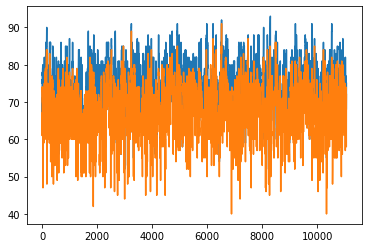

In [13]:
from matplotlib import pyplot as plt
plt.plot(df['potential'])
plt.plot(df['overall_rating'])
plt.show()

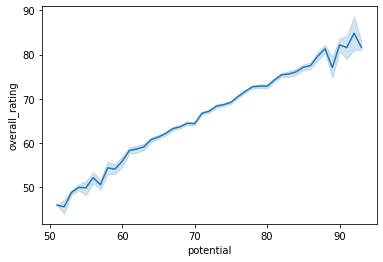

In [14]:
import seaborn as sns
sns.lineplot(df['potential'], df['overall_rating']);

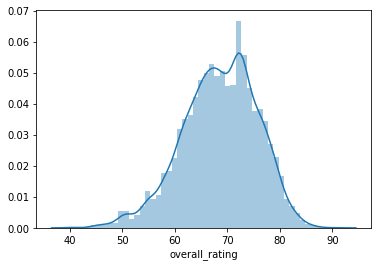

In [15]:
sns.distplot(df['overall_rating']);

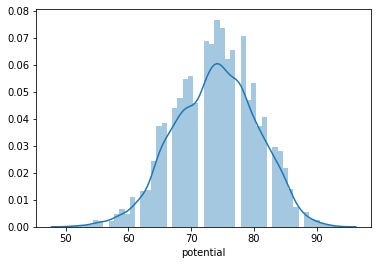

In [16]:
sns.distplot(df['potential']);

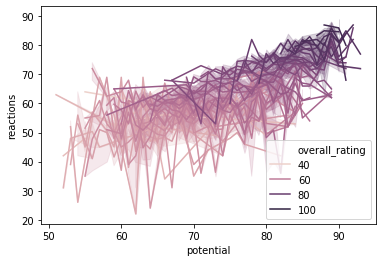

In [17]:
sns.lineplot(x="potential", y="reactions",
             hue="overall_rating",
             data=df);

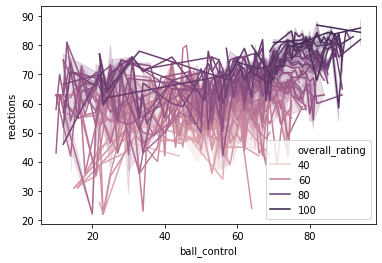

In [18]:
sns.lineplot(x="ball_control", y="reactions",
             hue="overall_rating",
             data=df);